## Esercizio 1

Si consideri il polinomio $$L(x)=(1/2) (5x^3-3x)$$ $x \in [-1,1]$

Si visualizzi il grafico del polinomio in [-1,1]

- Si implementi il metodo di Newton per la determinazione degli zeri di un'equazione non lineare [**Punti 4**]

In [54]:
import numpy as np
import math
import matplotlib.pyplot as plt
import sympy as sym

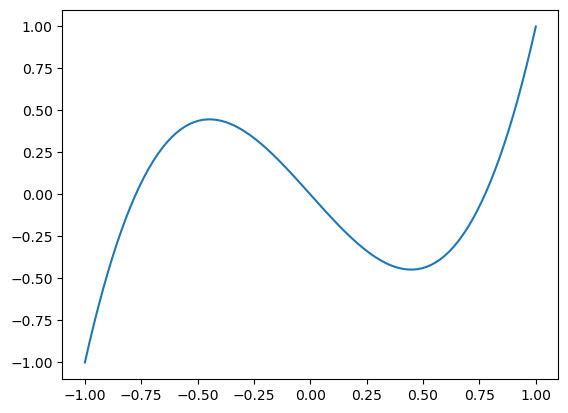

In [55]:
xx = np.linspace(-1, 1, 100)
Lx = lambda x: (1/2) * (5*x**3 - 3*x)
yy = Lx(xx)

tolx = 1e-6
tolf = 1e-6
maxit = 400

plt.plot(xx, yy)

In [56]:
def newton(fname,fpname,x0,tolx,tolf,nmax):
        xk=[]
        fx0 = fname(x0)
        if abs(fpname(x0)) <= np.spacing(1): #to do
            print(" derivata prima nulla in x0")
            return None, None,None
        
        d = fx0 / fpname(x0)
        x1 = x0 - d        
        fx1 = fname(x1)
        xk.append(x1)
        it = 1
        
        while abs(d) >= tolx * abs(x1) and abs(fx1) >= tolf and it < nmax: 
           x0 = x1
           fx0 = fname(x0)
           if abs(fpname(x0)) <= np.spacing(1): #Se la derivata prima e' più piccola della precisione di macchina stop
                print(" derivata prima nulla in x0")
                return None, None,None
           d = fx0 / fpname(x0)
           x1 = x0 - d
           fx1=fname(x1)
           it=it+1
         
           xk.append(x1)
          
        if it==nmax:
            print('raggiunto massimo numero di iterazioni \n')
            
        return x1,it,xk

- Si implementi il metodo di Bisezione per la determinazione degli zeri di un'equazione non lineare [**Punti 4**]

In [57]:
def sign(x):
    return math.copysign(1, x)

In [58]:
def metodo_bisezione(fname, a, b, tolx,tolf):
 fa=fname(a)
 fb=fname(b)
 if sign(fa) * sign(fb) >= 0:
     print("Non è possibile applicare il metodo di bisezione \n")
     return None, None,None

 it = 0
 v_xk = []
 maxit = math.ceil(math.log((b - a) / tolx) / math.log(2))-1
 
 while it < maxit and abs(b - a) >= tolx:
    xk = a + (b - a) / 2
    v_xk.append(xk)
    it += 1
    fxk=fname(xk)
    if fxk==0:
      return xk, it, v_xk

    if sign(fa)*sign(fxk)>0:   
      a = xk
      fa = fxk
    elif sign(fxk)*sign(fb)>0:    
      b = xk
      fb = fxk
 
 return xk, it, v_xk

- Si utilizzi il metodo di Newton con iterato iniziale $x_0=1$ per determinare lo zero $x^*$ piu' vicino ad 1. [**Punti 2**]

In [59]:
x0 = 1
# derivata di Lx
Lp = lambda x: (15/2 * x**2 - 3/2)

x_newton, it_newton, xk_newton = newton(Lx, Lp, x0,tolx,tolf, maxit)
print(f'x*_newton più vicino a 1 = {x_newton}, ottenuta in {it_newton} iterazioni')

x*_newton più vicino a 1 = 0.7745966765363306, ottenuta in 4 iterazioni


Si consideri la funzione $q(x)=L(x)/(x-x^*)$ dove $x^*$ è lo zero calcolato nel punto precedente. Si applichi il metodo di Newton con iterato iniziale $x_0=-0.5$ per calcolare uno zero della funzione $q(x)$  e si verifichi che è anche zero di $L(x)$  [**Punti 2**]

In [60]:
from sympy import lambdify

qx = lambda x: Lx(x) / (x - x_newton)
x = sym.symbols('x')

q1 =  (5*x**3-3*x)/((x-x_newton)*2)
qx_derivata = sym.diff(q1, x, 1) # derivata di q
qx_derivata_lambda = lambdify(x, qx_derivata, np)

x0_q = -0.5 

qx_newton, q_it_newton, q_xk_newton = newton(qx, qx_derivata_lambda, x0_q, tolx, tolf, maxit)
print(f'x che risolve q(x) = {qx_newton}, ottenuta in {q_it_newton} iterazioni')

x che risolve q(x) = -0.7745966728746391, ottenuta in 5 iterazioni


Si applichi il metodo di bisezione alle funzioni $q(x)$ ed $L(x)$ definite in [-1,1] e si fornisca una spiegazione teorica dei risultati ottenuti  [**Punti 2**]

In [65]:
xx = np.linspace(-1, 1, 100)
x_L_bisezione, it_L_bisezione, v_xk_L_bisezione = metodo_bisezione(Lx, -1, 1, tolx, tolf)
print(f'x_L_bisezione = {x_L_bisezione}, ottenuta in {it_L_bisezione} iterazioni')
x_q_bisezione, it_q_bisezione, v_xk_q_bisezione = metodo_bisezione(qx, -1, 1, tolx, tolf)
print(f'x_q_bisezione = {x_q_bisezione}, ottenuta in {it_q_bisezione} iterazioni')

x_L_bisezione = 0.0, ottenuta in 1 iterazioni
Non è possibile applicare il metodo di bisezione 

x_q_bisezione = None, ottenuta in None iterazioni


Il metodo di bisezione non è applicabile per Q, perché la soluzione di L(x) è 0, quindi si dovrebbe dividere per 0

                                                                                                                Punti [14]